Размер датасета до фильтрации: (344, 9)


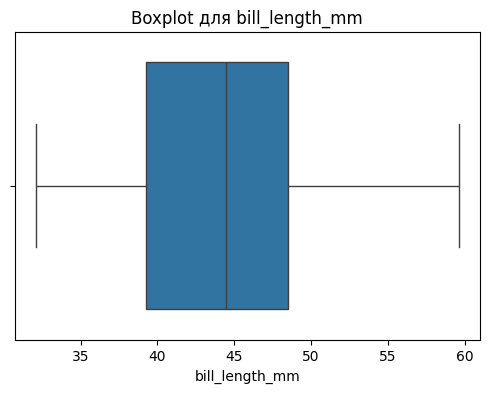

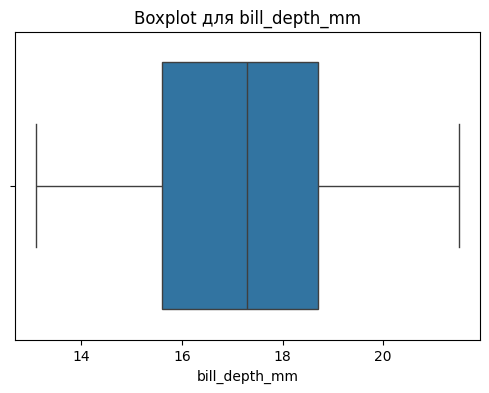

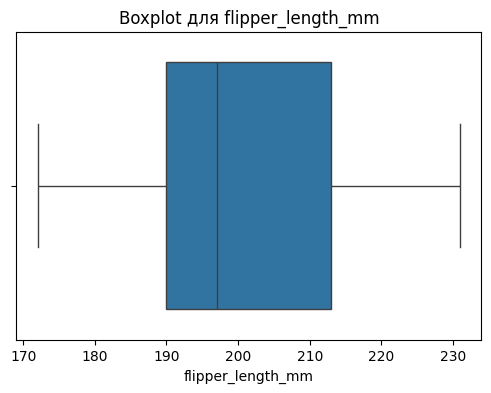

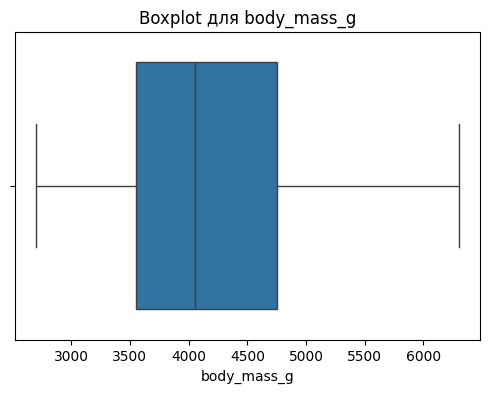

Размер датасета после фильтрации: (342, 9)


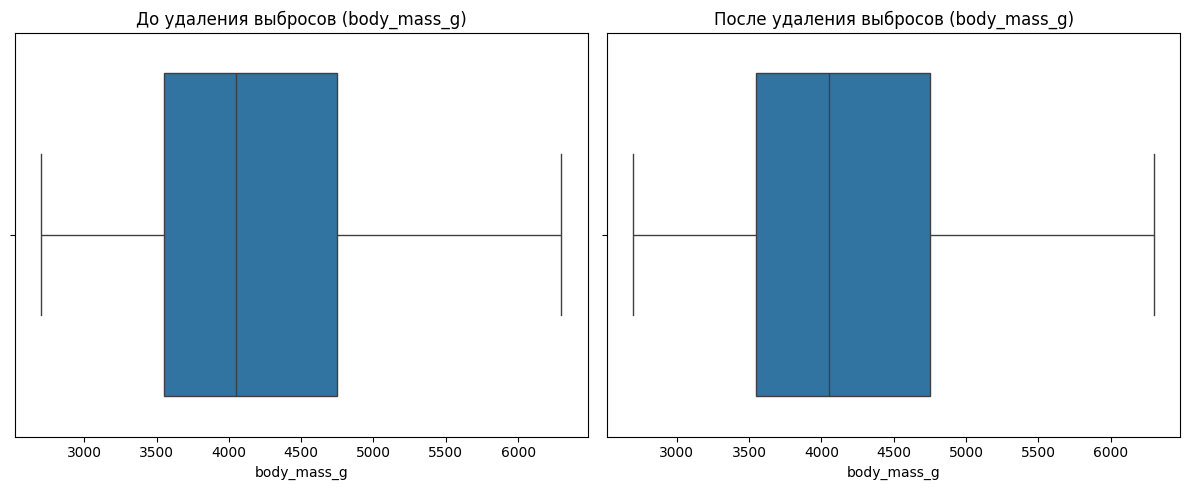

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# датасет penguins
penguins = pd.read_csv('penguins.csv')  

# Размеры датасета до фильтрации
print("Размер датасета до фильтрации:", penguins.shape)

#  Построение boxplot-графиков для указанных признаков
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=penguins[feature])
    plt.title(f'Boxplot для {feature}')
    plt.show()

#  Выявление и удаление выбросов с помощью IQR для каждого из признаков
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

penguins_filtered = penguins.copy()
for feature in features:
    penguins_filtered = remove_outliers_iqr(penguins_filtered, feature)

#  Размеры датасета после фильтрации
print("Размер датасета после фильтрации:", penguins_filtered.shape)

#  Построение boxplot до и после удаления выбросов для одного признака
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=penguins['body_mass_g'])
plt.title('До удаления выбросов (body_mass_g)')

plt.subplot(1, 2, 2)
sns.boxplot(x=penguins_filtered['body_mass_g'])
plt.title('После удаления выбросов (body_mass_g)')

plt.tight_layout()
plt.show()